<div dir="rtl" align="center">
  
<img src="https://cdn.discordapp.com/attachments/732234196487241741/974257234387292191/unknown.png" width="100px">

دانشگاه صنعتی امیرکبیر (پلی‌تکنیک تهران)

# **تمرین دوم (بخش عملی)**

<br />

درس:

### **داده‌کاوی**

<br />

دانشجو:

### **امیرحسین علی‌بخشی**

<br />

شماره دانشجویی:

### **۹۷۳۱۰۹۶**

<br />

استاد:

### **دکتر ناظرفرد**

<br />

</div>

---

In [6]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [2]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras.optimizers import Adam
from keras.datasets import fashion_mnist
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix


<div dir="rtl">

# بخش اول

</div>

<div dir="rtl">

ابتدا مجموعه‌داده‌ی گفته شده را دریافت می‌کنیم و داده‌های آن را هم در جدول و هم در نمودار پراکندگی نمایش می‌دهیم:

</div>

In [3]:
data, labels = make_circles(
    300, 
    noise=0.02, 
    shuffle=True
)
circle = pd.DataFrame({
    'x': data[:, 0], 
    'y': data[:, 1], 
    'label': labels
})
circle

,x,y,label
0,0.905958,0.409807,0
1,0.313590,-0.715556,1
2,-0.544999,-0.610655,1
3,0.686356,-0.407610,1
4,-0.720002,0.367474,1
...,...,...,...
295,-0.700094,-0.415210,1
296,0.768748,0.636607,0
297,-0.730373,-0.673148,0
298,0.945391,-0.357163,0


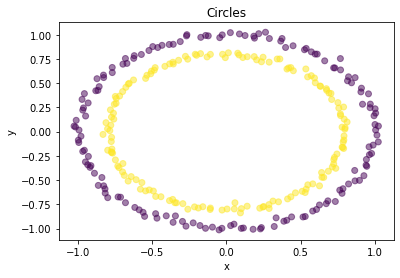

In [4]:
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.5)
plt.title('Circles')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<div dir="rtl">

داده‌ها را به دو بخش تست و آموزش با نسبت ۲۵٪ به ۷۵٪ تقسیم می‌کنیم.

</div>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=10, train_size =0.75)
print(X_train.shape , X_test.shape)

(225, 2) (75, 2)


<div dir="rtl">

---

## ساخت شبکه عصبی دلخواه بدون تابع فعال‌سازی

این شبکه ۲ عدد hidden layer دارد که به ترتیب ۶۰ و ۴۰ نورون دارد. در لایه خروجی هم یک نورون  داریم.


</div>


In [6]:
model_1 = Sequential()
model_1.add(Dense(60, input_dim=2))
model_1.add(Dense(40))
model_1.add(Dense(1))


<div dir="rtl">

حال مدل را کامپایل میکنیم و
 تابع خطای `binary_crossentropy` به آن نسبت میدهیم.
همجنین برای ارزیابی از متریک `accuracy` (صحت) استفاده می‌کنیم.

به دلیل عدم استفاده از activation function ها صحت مدل بسیار پایین می‌باشد. 

</div>

In [7]:
def plot_accuracy_and_loss(history, title):
  plt.subplots(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], c='g')
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], c='r')
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.suptitle(title)
  plt.show()

Epoch 1/40
8/8 [==============================] - 1s 4ms/step - loss: 0.7245 - accuracy: 0.4311
Epoch 2/40
8/8 [==============================] - 0s 5ms/step - loss: 0.7083 - accuracy: 0.4400
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.7161 - accuracy: 0.5156
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5156
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.7052 - accuracy: 0.4622
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.4356
Epoch 7/40
8/8 [==============================] - 0s 6ms/step - loss: 0.7184 - accuracy: 0.4578
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.7233 - accuracy: 0.5067
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.7147 - accuracy: 0.5111
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.7204 - accuracy: 0.5156
Epoch 11/40
8/8 [======================

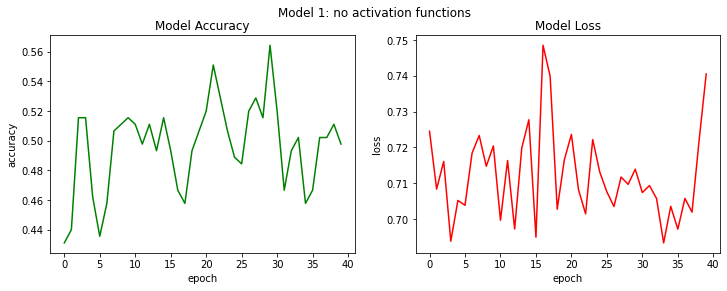

In [14]:
model_1.compile(
  loss='binary_crossentropy', 
  optimizer='adam', 
  metrics=['accuracy']
)

history_1 = model_1.fit(X_train, y_train, epochs=40)

_, test_accuracy_1 = model_1.evaluate(X_train, y_train)

print('Accuracy: {}'.format(test_accuracy_1 * 100))

plot_accuracy_and_loss(history_1, 'Model 1: no activation functions')




<div dir="rtl">

حال مدل را روی داده های تست پردیکت می‌کنیم که صحت ۵۰ درصد را به ما میدهد که درصد پایینی محصوب می‌شود.

</div>

In [15]:
predictions_1 = (model_1.predict(X_test) > 0.5).astype(int)
true_predicts_1 = 0
for i in range(len(predictions_1)):
  if(predictions_1[i] == y_test[i]):
    true_predicts_1+=1

test_accuracy_1 = true_predicts_1/75
test_accuracy_1

0.5066666666666667


<div dir="rtl">

---

## استفاده از تابع فعال‌ساز خطی 

یک شبکه عصبی مشابه بخش قبل می‌سازیم با این تفاوت که برای لایه‌های میانی از توابع فعال‌سازی ReLU استفاده می‌کنیم.

$$ max(0, x) $$

همچنین در نورون لایه آخر با توجه به binary بودن دسته بندی از تابع sigmoid بهره می‌بریم.

$$ S (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$ 


</div>

In [16]:
model_2 = Sequential()
model_2.add(Dense(60, input_dim=2 , activation = 'relu'))
model_2.add(Dense(40 , activation = 'relu'))
model_2.add(Dense(1 , activation = 'sigmoid'))

Epoch 1/40
8/8 [==============================] - 1s 4ms/step - loss: 0.7012 - accuracy: 0.4311
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4933
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5156
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5200
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5333
Epoch 6/40
8/8 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5378
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5378
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5244
Epoch 9/40
8/8 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5378
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5556
Epoch 11/40
8/8 [======================

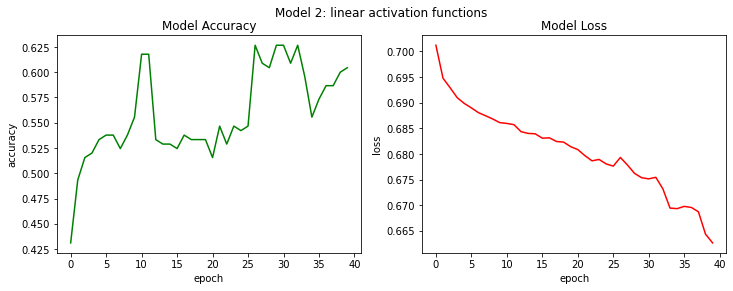

In [17]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs=40)
_, train_accuracy_2 = model_2.evaluate(X_train, y_train)
print('Accuracy: {}'.format(train_accuracy_2*100))

plot_accuracy_and_loss(history_2, 'Model 2: linear activation functions')



<div dir="rtl">

در این بخش نیز مدل را کامپایل می‌کنیم و
 تابع خطای `binary_crossentropy` به آن نسبت میدهیم.
همچنین برای ارزیابی از متریک `accuracy` (صحت) استفاده می‌کنیم.

مشاهده می‌شود که عملکرد این شبکه عصبی نسبت به حالت قبل بهبود یافته است اما کماکان برای پیش‌بینی قابل قبول نیست. 

</div>

In [18]:
predictions_2 = (model_2.predict(X_test) > 0.5).astype(int)
true_predicts_2 = 0
for i in range(len(predictions_2)):
  if(predictions_2[i] == y_test[i]):
    true_predicts_2+=1

test_accuracy_2 = true_predicts_2/75
test_accuracy_2

0.56


<div dir="rtl">

## استفاده از تابع خطای مناسب برای مسائل رگرسیون

حالت قبل را دوباره پیاده‌سازی می‌کنیم اما بجای استفاده از `binary_crossentropy` از تابع خطای `mean_squared_error` استفاده می‌کنیم.

$$MSE=\frac{1}{n}\times\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$

</div>

In [19]:
model_r = Sequential()
model_r.add(Dense(60, input_dim=2 , activation = 'relu'))
model_r.add(Dense(40 , activation = 'relu'))
model_r.add(Dense(1 , activation = 'sigmoid'))

Epoch 1/40
8/8 [==============================] - 1s 14ms/step - loss: 0.2481 - accuracy: 0.5111
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.5022
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2463 - accuracy: 0.5022
Epoch 4/40
8/8 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.5022
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.5200
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.5333
Epoch 7/40
8/8 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.5289
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 0.5333
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.5511
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2437 - accuracy: 0.5511
Epoch 11/40
8/8 [=====================

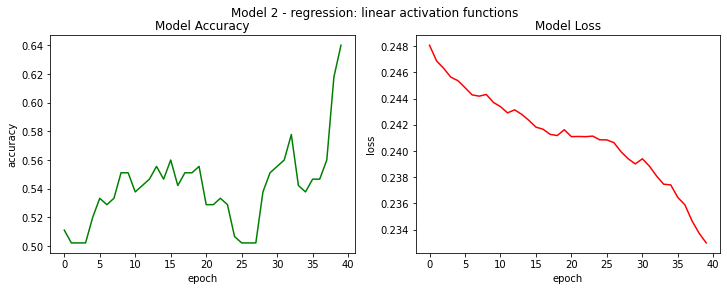

In [20]:
model_r.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history_r = model_r.fit(X_train, y_train, epochs=40)
_, train_accuracy_r = model_r.evaluate(X_train, y_train)
print('Accuracy: {}'.format(train_accuracy_r*100))

plot_accuracy_and_loss(history_r, 'Model 2 - regression: linear activation functions')


In [21]:
predictions_r = (model_r.predict(X_test) > 0.5).astype(int)
true_predicts_r = 0
for i in range(len(predictions_r)):
  if(predictions_r[i] == y_test[i]):
    true_predicts_r+=1

test_accuracy_r = true_predicts_r/75
test_accuracy_r

0.56


<div dir="rtl">

مشاهده می‌شود که عملکرد نسبت به قبل بهبود یافته ولی کماکان قابل قبول نیست و باید عملکرد بهتری از خود نشان دهد. عواملی مانند تغییر تعداد نورون‌ها و همچنین تغییر در نرخ یادگیری می‌تواند در این امر تاثیر مناسبی بگذارند.

</div>


<div dir="rtl">

---

## ساخت شبکه عصبی با یک لایه

در این مرحله شبکه عصبی با یک لایه تعریف میکنیم که همانطور که مشخص است هم در داده های تست و هم آموزش بدتر نسبت به حالتی که چند لایه پنهان دارد عمل میکند
در کل برای دسته بندی داده های زیاد باید از چندین لایه پنهان برای عملکرد بهتر استفاده کنیم

</div>


In [22]:
model_3 = Sequential()
model_3.add(Dense(60, input_dim=2 , activation = 'relu'))
model_3.add(Dense(1 , activation = 'sigmoid'))

Epoch 1/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.4933
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2538 - accuracy: 0.5156
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.5111
Epoch 4/40
8/8 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.5067
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.5067
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.5156
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.5111
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.5156
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2506 - accuracy: 0.5244
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.5200
Epoch 11/40
8/8 [======================

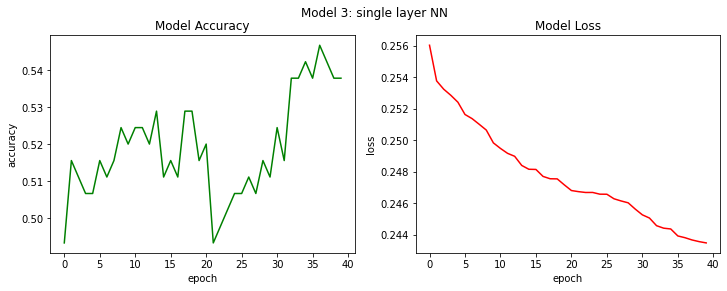

In [23]:
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs=40)
_, train_accuracy_3 = model_3.evaluate(X_train, y_train)
print('Accuracy: {}'.format(train_accuracy_3*100))

plot_accuracy_and_loss(history_3, 'Model 3: single layer NN')

In [24]:
predictions3 = (model_3.predict(X_test) > 0.5).astype(int)
true_predicts3 = 0
for i in range(len(predictions3)):
  if(predictions3[i] == y_test[i]):
    true_predicts3+=1

test_accuracy3 = true_predicts3/75
test_accuracy3

0.48

<div dir="rtl">

---

## تنظیم نرخ یادگیری به صورت دستی

در این مرحله می‌خواهیم شبکه عصبی مرحله قبل را با نرخ‌های یادگیری متفاوت بررسی کرده و نتابح را با هم مقایسه کنیم. نرخ‌های یادگیری مورد بررسی به صورت زیر خواهند بود:

</div>

- μ = 0.0001
- μ = 0.001
- μ = 0.002
- μ = 0.01
- μ = 0.175

Learning Rate: 0.0001
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 4ms/step - loss: 0.2472 - accuracy: 0.5022
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.5022
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2470 - accuracy: 0.5022
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.5022
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.5022
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.5022
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.5022
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.5022
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.5022
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.5022
Epoch 11/40
8/8 [==============================] -

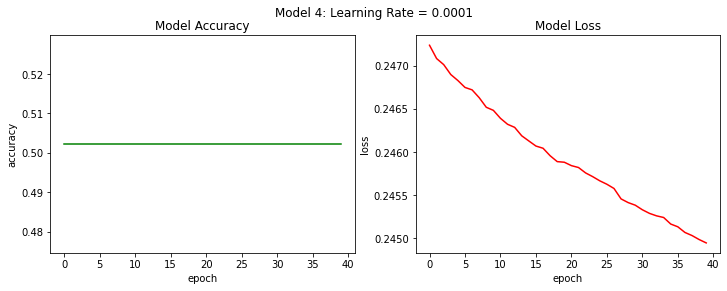

0.49333333333333335
Learning Rate: 0.001
Epoch 1/40
8/8 [==============================] - 1s 4ms/step - loss: 0.2504 - accuracy: 0.5111
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.4889
Epoch 3/40
8/8 [==============================] - 0s 5ms/step - loss: 0.2483 - accuracy: 0.5556
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2480 - accuracy: 0.5467
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2477 - accuracy: 0.5111
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.5067
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.5244
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.5422
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.5689
Epoch 10/40
8/8 [==============================] - 0s 5ms/step - loss: 0.2457 - accuracy: 0.520

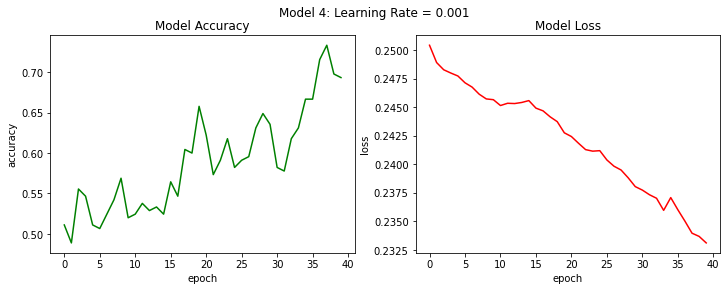

0.5466666666666666
Learning Rate: 0.002
Epoch 1/40
8/8 [==============================] - 1s 5ms/step - loss: 0.2495 - accuracy: 0.4844
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2475 - accuracy: 0.5022
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.5022
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2449 - accuracy: 0.5022
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.5022
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.5022
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2435 - accuracy: 0.5022
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.5511
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.5689
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 0.5556

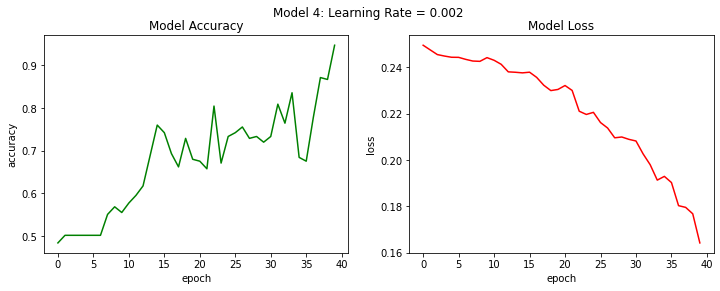

0.7866666666666666
Learning Rate: 0.01
Epoch 1/40
8/8 [==============================] - 1s 5ms/step - loss: 0.2543 - accuracy: 0.4978
Epoch 2/40
8/8 [==============================] - 0s 5ms/step - loss: 0.2452 - accuracy: 0.5022
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2438 - accuracy: 0.5156
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.5333
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.5022
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.5733
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2292 - accuracy: 0.5867
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.5822
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.6667
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.6844


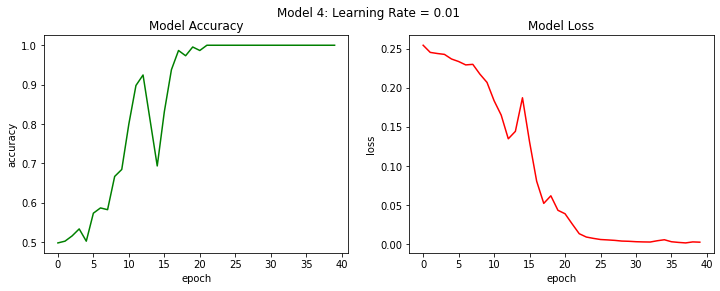

1.0
Learning Rate: 0.175
Epoch 1/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4597 - accuracy: 0.5111
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 7/40
8/8 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 8/40
8/8 [==============================] - 0s 6ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 9/40
8/8 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.5022
Epoch 11/40
8/

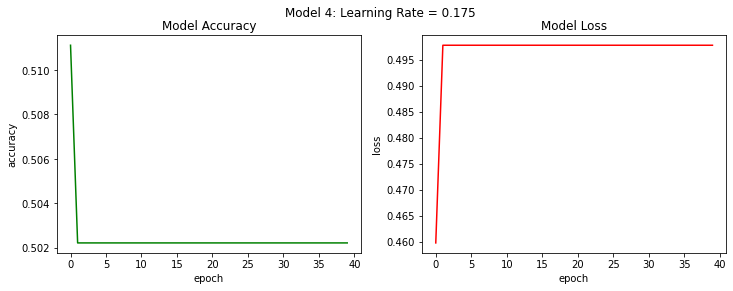

0.49333333333333335


In [26]:
learning_rates = [0.0001, 0.001, 0.002, 0.01, 0.175]
models_4 = [Sequential(), Sequential(), Sequential(), Sequential(), Sequential()]
colors = ['b', 'g', 'r', 'y', 'k']
loss, accuracy, train_accuracy = [], [], []

for index, learning_rate in enumerate(learning_rates):
  print('='*105)
  print('Learning Rate: ' + str(learning_rate))
  opt = Adam(lr=learning_rate)
  
  models_4[index].add(Dense(60, input_dim=2 , activation = 'relu'))
  models_4[index].add(Dense(40, activation = 'relu'))
  models_4[index].add(Dense(1 , activation = 'sigmoid'))

  models_4[index].compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
  history_4 = models_4[index].fit(X_train, y_train, epochs=40)
  _, train_accuracy4 = models_4[index].evaluate(X_train, y_train)
  print('Accuracy: {}'.format(train_accuracy4*100))
  train_accuracy.append(train_accuracy4)

  accuracy.append(history_4.history['accuracy'])
  loss.append(history_4.history['loss'])
  plot_accuracy_and_loss(history_4, 'Model 4: Learning Rate = {}'.format(learning_rate))


  predictions_4 = (models_4[index].predict(X_test) > 0.5).astype(int)
  true_predicts_4 = 0
  for i in range(len(predictions_4)):
    if(predictions_4[i] == y_test[i]):
      true_predicts_4+=1
  test_accuracy_4 = true_predicts_4/75
  print(test_accuracy_4)

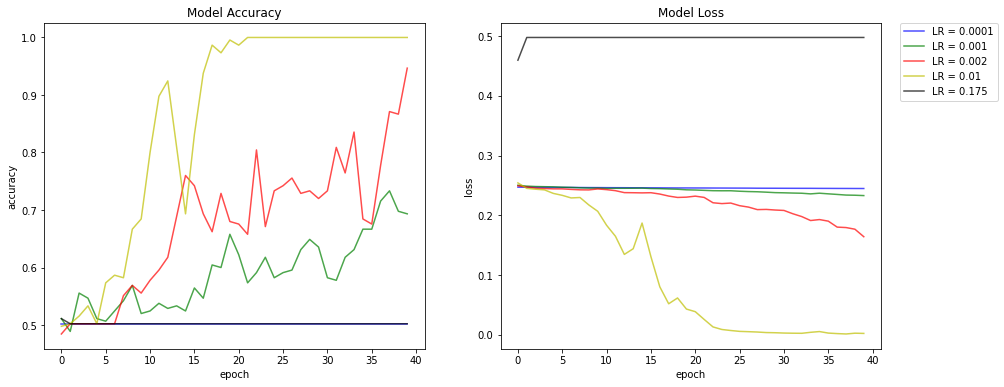

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for index, learning_rate in enumerate(learning_rates):
  axs[0].plot(accuracy[index], c=colors[index], label='LR = {}'.format(learning_rate), alpha=.7)
  axs[0].set_title('Model Accuracy')
  axs[0].set_ylabel('accuracy')
  axs[0].set_xlabel('epoch')
  
  axs[1].plot(loss[index], c=colors[index], label='LR = {}'.format(learning_rate), alpha=.7)
  axs[1].set_title('Model Loss')
  axs[1].set_ylabel('loss')
  axs[1].set_xlabel('epoch')
  axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

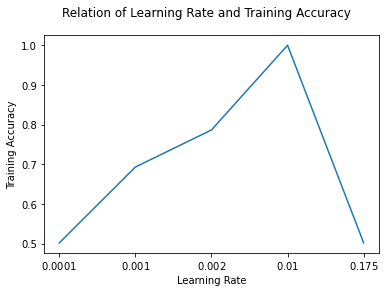

In [28]:
fig, ax = plt.subplots()
ax.plot(train_accuracy)
ax.set_xticks(np.arange(5))
ax.set_xticklabels([r"${}$".format(l) for l in learning_rates])
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Training Accuracy')
fig.suptitle('Relation of Learning Rate and Training Accuracy')
plt.show()



<div dir="rtl">

همانطور که مشاهده می‌شود:

- در حالاتی که نرخ یادگیری از حدی پایین تر باشد، قدم‌های یادگیری مدت بسیار کوتاه خواهد بود. در نتیجه‌ی این امر، یادگیری فرآیندی زمانبر می‌باشد. بنابراین برای نتیجه‌گیری بهتر باید تعداد epoch ها را افزایش دهیم. (البته باید در نظر داشت که احتمال گیر کردن در اکسترمم محلی وجود دارد)

- با زیاد شدن نرخ یادگیری، مدل واگرا می‌شود و عملکرد خوبی نخواهد داشت.

با توجه به نموداری که در زیر رسم شده. نرخ یادگیری 0.01 را بعنوان نرخ یادگیری مناسب انتخاب می‌کنیم.
</div>



<div dir="rtl">

---

## ساخت شبکه عصبی نهایی

شبکه عصبی نهایی که قرار است از آن استفاده کنیم شامل دو لایه نهان به ترتیب شامل ۶۰ و ۴۰ نرون با توابع فعال‌سازی ReLU بوده که 
ورودی آن دو عدد (به عنوان مختصات نقطه‌ی ورودی) و یک لایه‌ی خروجی تحت که با توجه به اینکه قرار است یک خروجی باینری تولید کند، از تابع فعال‌سازی sigmoid استفاده می‌کند.

<img src="https://cdn.discordapp.com/attachments/732234196487241741/972213246750761000/nn_1.png" alt="architecture">

در این شبکه نرخ یادگیری برابر `0.01`، تابع هزینه تابع MSE و همچنین از متریک صحت استفاده می‌کنیم و فرآیند آموزش را در ۴۰ epoch انجام می‌دهیم.

</div>



In [29]:
model_final = Sequential()
model_final.add(Dense(60, input_dim=2 , activation = 'relu'))
model_final.add(Dense(40, activation = 'relu'))
model_final.add(Dense(1 , activation = 'sigmoid'))

model_final.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 60)                180       
                                                                 
 dense_48 (Dense)            (None, 40)                2440      
                                                                 
 dense_49 (Dense)            (None, 1)                 41        
                                                                 
Total params: 2,661
Trainable params: 2,661
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 5ms/step - loss: 0.2513 - accuracy: 0.4667
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.5511
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2398 - accuracy: 0.5644
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 0.6133
Epoch 5/40
8/8 [==============================] - 0s 5ms/step - loss: 0.2304 - accuracy: 0.5511
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.5600
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2294 - accuracy: 0.5422
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.6489
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.6667
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.2126 - accuracy: 0.6978
Epoch 11/40
8/8 [==============================] -

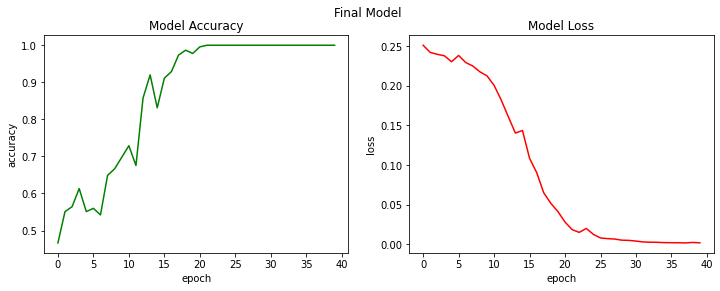

1.0

In [30]:
model_final.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01), metrics=['accuracy'])
history_final = model_final.fit(X_train, y_train, epochs=40)
_, train_accuracy_final = model_final.evaluate(X_train, y_train)
print('Accuracy: {}'.format(train_accuracy_final*100))
plot_accuracy_and_loss(history_final, 'Final Model')
predictions_final = (model_final.predict(X_test) > 0.5).astype(int)
true_predicts_final = 0
for i in range(len(predictions_final)):
  if(predictions_final[i] == y_test[i]):
    true_predicts_final+=1

test_accuracy5 = true_predicts_final/75
test_accuracy5


<div dir="rtl">

---

# بخش دوم

</div>


<div dir="rtl">

## دریافت داده‌ها

ابتدا داده‌ها را دریافت می‌کنیم

</div>

In [57]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)



<div dir="rtl">

---

## ترسیم داده‌ها

حال برای بررسی درستی داده‌ها، صد داده‌ی اول این مجموعه‌داده را رسم می‌کنیم.

</div>

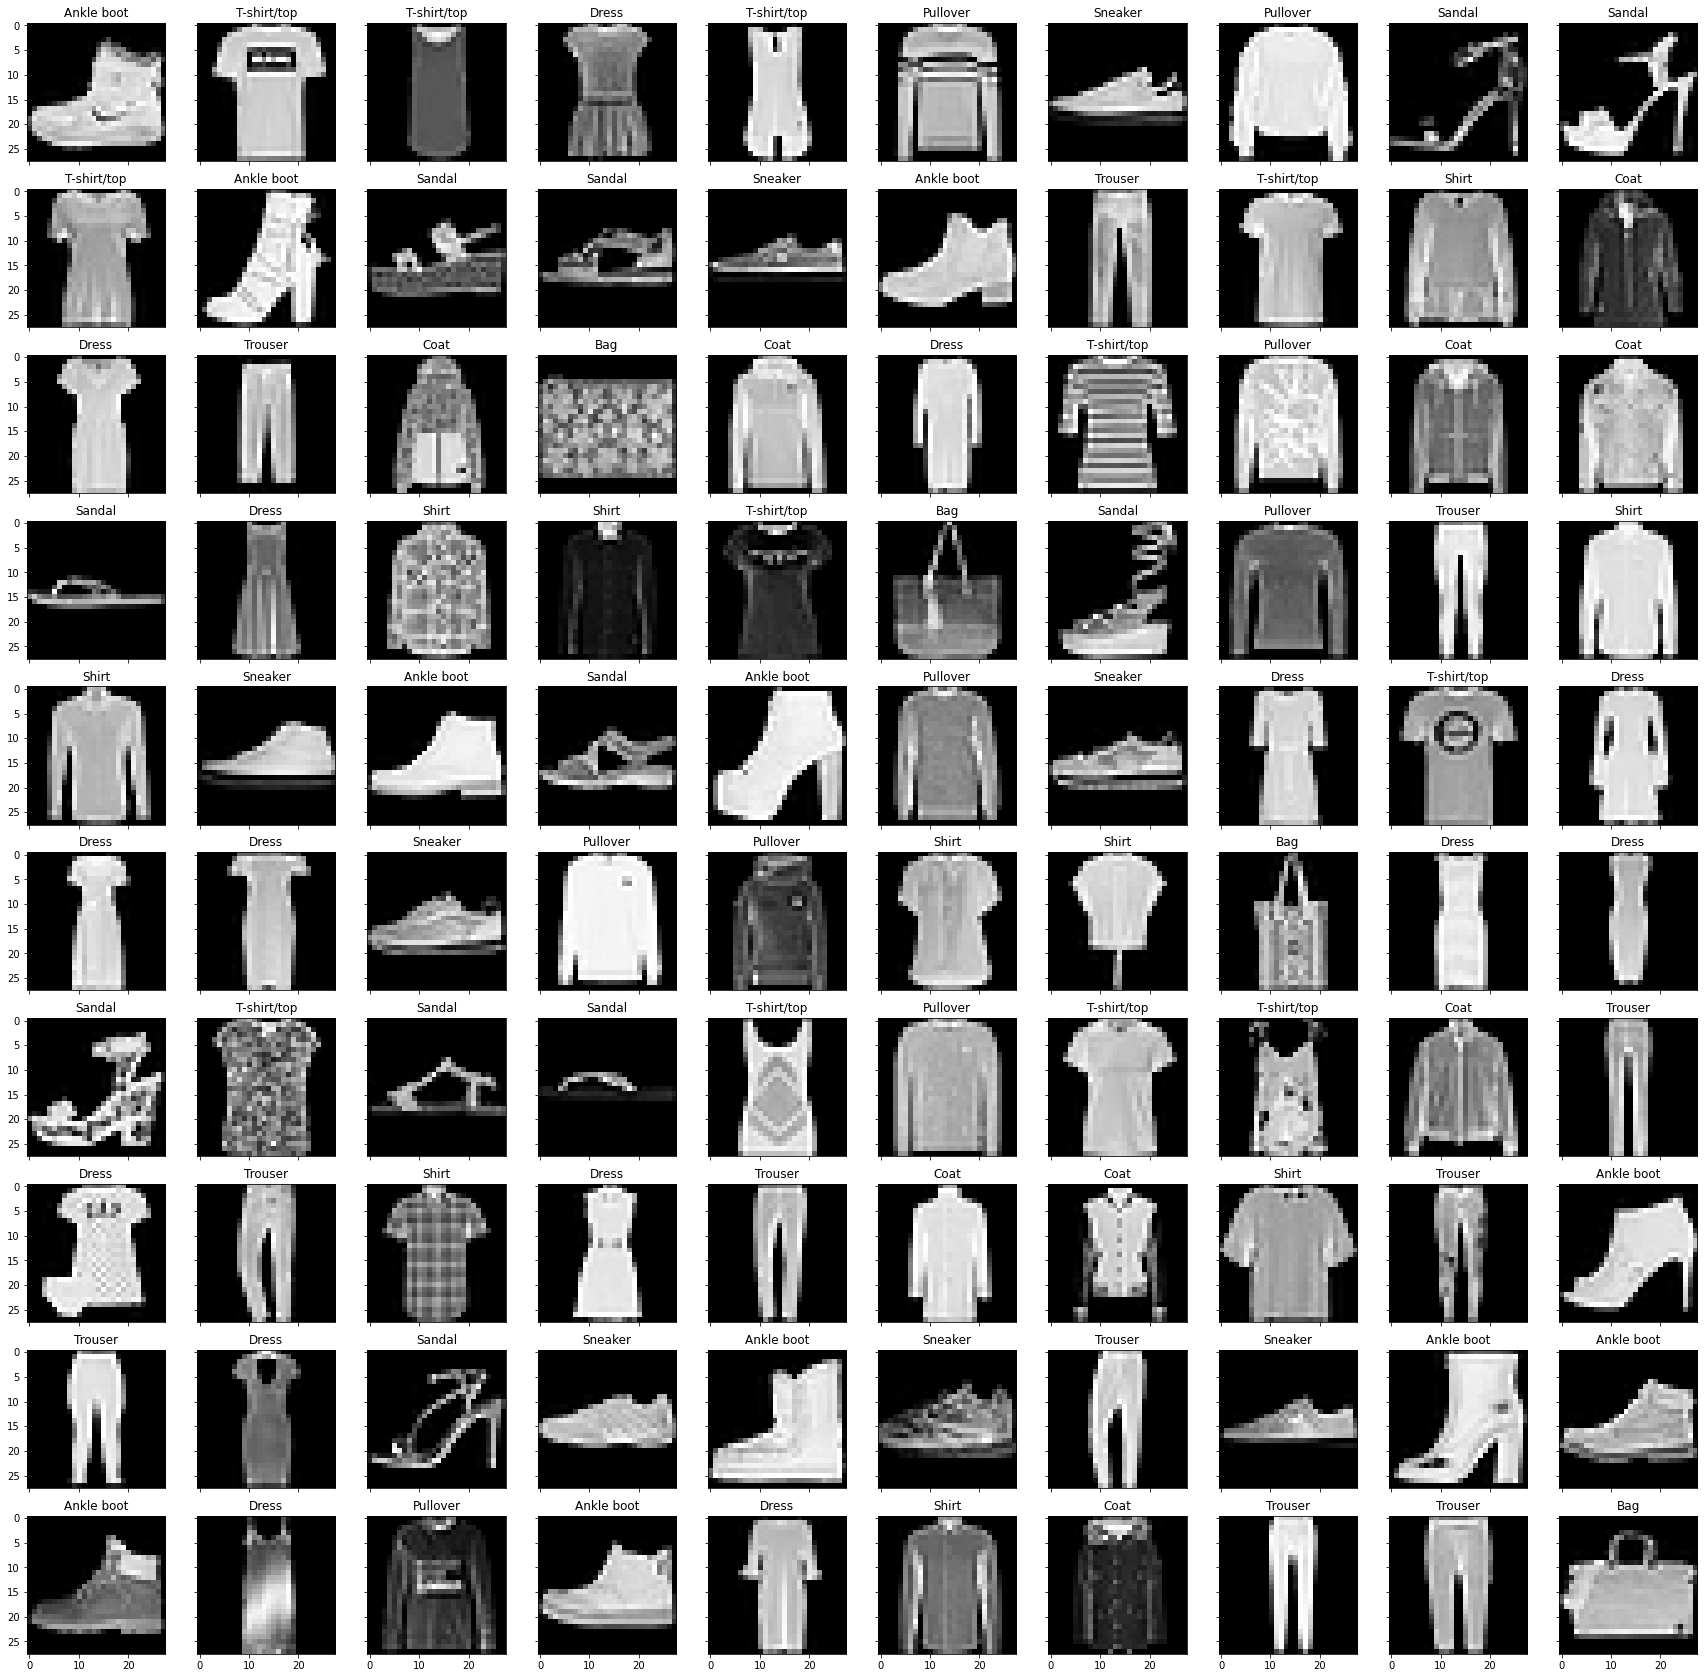

In [59]:
PLT_SIZE = 10
fig, axs = plt.subplots(PLT_SIZE, PLT_SIZE, sharex=True, sharey=True, figsize=(30,30))

for i in range(PLT_SIZE):
  for j in range(PLT_SIZE):
    axs[i, j].imshow(trainX[i*PLT_SIZE+j], cmap=plt.get_cmap('gray'))
    axs[i, j].set_title(label_names[trainy[i*PLT_SIZE+j]])



<div dir="rtl">

---

## تغییر شکل داده‌ها

برای سهولت کار برای شبکه عصبی، داده‌ها را reshape می‌کنیم.

</div>

In [48]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainy = trainy.reshape((trainy.shape[0] , 1))
testy = testy.reshape((testy.shape[0] , 1))

print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [41]:
from tensorflow.keras.utils import to_categorical

In [49]:
trainy = to_categorical(trainy, dtype ="uint8")
testy = to_categorical(testy, dtype ="uint8")

print(trainy)
print(testy)

[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



<div dir="rtl">

---

##  ساخت مدل

در این بخش لایه‌های شبکه عصبی مورد نظر را می‌سازیم.
</div>

In [50]:
model_mnist = Sequential()
model_mnist.add(Dense(100, input_shape=(28, 28, 1) , activation = 'relu'))
model_mnist.add(Dense(150 , activation = 'relu'))
model_mnist.add(Flatten())
model_mnist.add(Dense(10 , activation = 'softmax'))

model_mnist.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 28, 28, 100)       200       
                                                                 
 dense_54 (Dense)            (None, 28, 28, 150)       15150     
                                                                 
 flatten_1 (Flatten)         (None, 117600)            0         
                                                                 
 dense_55 (Dense)            (None, 10)                1176010   
                                                                 
Total params: 1,191,360
Trainable params: 1,191,360
Non-trainable params: 0
_________________________________________________________________



<div dir="rtl">

---

##  آموزش مدل

آموزش را با  نرخ یادگیری `0.01` و در ۳۰ epoch انجام می‌دهیم.
</div>

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 22s 11ms/step - loss: 2.1874 - accuracy: 0.8019
Epoch 2/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4425 - accuracy: 0.8392
Epoch 3/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4201 - accuracy: 0.8474
Epoch 4/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4111 - accuracy: 0.8502
Epoch 5/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4042 - accuracy: 0.8520
Epoch 6/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3999 - accuracy: 0.8533
Epoch 7/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3949 - accuracy: 0.8549
Epoch 8/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3900 - accuracy: 0.8582
Epoch 9/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3913 - accuracy: 0.8578
Epoch 10/30
1875/1875 [==============================] - 21s 11ms/step - lo

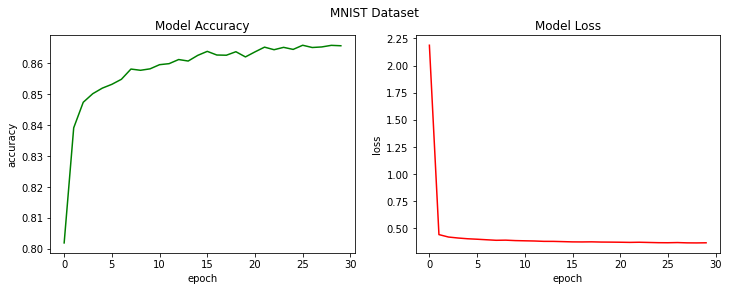

In [51]:
model_mnist.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
history_mnist = model_mnist.fit(trainX, trainy, epochs=30)
_, train_accuracy_mnist = model_mnist.evaluate(trainX, trainy)
print('Accuracy: {}'.format(train_accuracy_mnist*100))
plot_accuracy_and_loss(history_mnist, 'MNIST Dataset')


<div dir="rtl">

---

##  پیش‌بینی

در این بخش مدل خود را تست می‌کنیم.

</div>

In [54]:
y_preds = model_mnist.predict(testX).argmax(axis=1)
rounded_labels = np.argmax(testy, axis=1)


<div dir="rtl">

---

##  رسم ماتریس درهم‌ریختگی

</div>

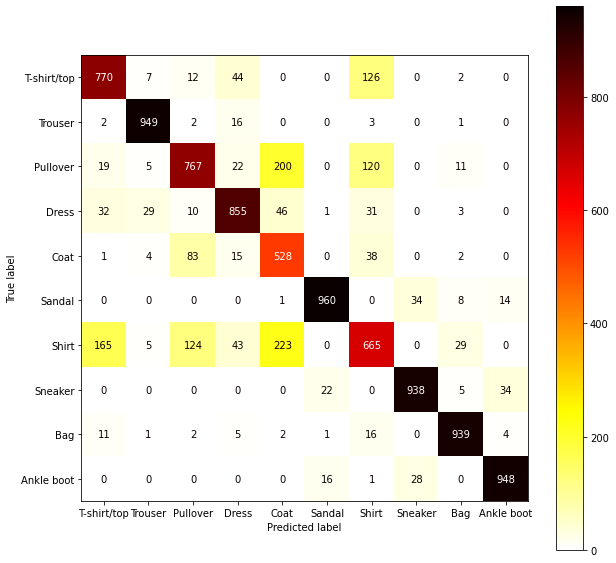

In [55]:
mat=ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_preds,rounded_labels), 
    display_labels=label_names
    )
fig, ax = plt.subplots(figsize=(10,10))
mat.plot(ax=ax, cmap='hot_r');


<div dir="rtl">

از این ماتریس می‌توان متوجه شد که مدل به طور کلی عملکرد نسبتا مناسبی داشته ولی در تشخیص لباس‌هایی که با هم شباهت دارند (بعنوان مثال `Shirt` و `Pullover` و `Coat`) دچار اشتباه شده است.

</div>